In [33]:
import matplotlib.style as style
style.use('seaborn-darkgrid')

import pandas as pd
import numpy as np
import os
import csv
from csv import reader
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import rand, seed
import scipy.stats as stats
import pyDOE2 as doe2
%matplotlib inline
from numpy.random import rand, seed

In [34]:
import itertools

# Create the inputs:
encoded_inputs = list( itertools.product([-1,1],[-1,1],[-1,1],[-1,1],[-1,1],[-1,1],[-1,1],[-1,1]) )

# Create the experiment design table:
doe = pd.DataFrame(encoded_inputs,columns=['x%d'%(i+1) for i in range(8)])

In [35]:
design = doe2.ff2n(8)

shape = np.shape(design)

init_list = []
altkey = []
def signeval(check):
    if check == -1:
        result = 'm'
    elif check == 1:
        result = 'p'
    else: 
        result = 'fail'
    return result

for i in range(shape[0]):
    string1 = 'init(5,1,1,3,3,3,'
    string2 = 'A' + signeval(design[i][0]) + ','
    string3 = 'B' + signeval(design[i][1]) + ','
    string4 = 'C' + signeval(design[i][2]) + ','
    string5 = 'D' + signeval(design[i][3]) + ','
    string6 = 'E' + signeval(design[i][4]) + ','
    string7 = 'F' + signeval(design[i][5]) + ','
    string8 = 'G' + signeval(design[i][6]) + ','
    string9 = 'H' + signeval(design[i][7]) + ','
    string10 = ''
    if string2[1] == 'p':
        string10 = 'a'
        key2 = '1'
    else:
        key2='-1'
    if string3[1] == 'p':
        string10 = string10 + 'b'
        key3 = '1'
    else:
        key3='-1'
    if string4[1] == 'p':
        key4 = '1'
        string10 = string10 + 'c'
    else:
        key4='-1'
    if string5[1] == 'p':
        string10 = string10 + 'd'
        key5 = '1'
    else:
        key5='-1'
    if string6[1] == 'p':
        string10 = string10 + 'e'
        key6 = '1'
    else:
        key6='-1'
    if string7[1] == 'p':
        string10 = string10 + 'f'
        key7 = '1'
    else:
        key7='-1'
    if string8[1] == 'p':
        string10 = string10 + 'g'
        key8 = '1'
    else:
        key8='-1'
    if string9[1] == 'p':
        string10 = string10 + 'h'
        key9 = '1'
    else:
        key9='-1'
    altkey.append(string10)#,key2,key3,key4,key5,key6,key7,key8,key9])
    string10 = '\'{}\')'.format(string10)
    strung = string1 + string2 + string3 + string4 + string5 + string6 + string7 + string8 + string9 + string10

In [37]:
postanalysis = '1500pp_15del'

In [38]:
fileList = os.listdir(str(postanalysis)) #Read files in folder into list 

treatments = []
for file in fileList: #Loop through list of files using file as identifier
    path = postanalysis+ '/' 
    if file == fileList[0]:
        split_file_name = file.split("_")
        with open(path+file, newline='') as f:
            reader = csv.reader(f)
            read = []
            for row in reader:
                read.append(row)
            first = read[0][0]
            last = read[-1][-1]
            Response_Variable = float(last) - float(first)
            treatments.append([split_file_name[0],Response_Variable])
    else:
        split_file_name = file.split("_")
        with open(path+file, newline='') as f:
            reader = csv.reader(f)
            read = []
            for row in reader:
                read.append(row)
            first = read[0][0]
            last = read[-1][-1]
            Response_Variable = float(last) - float(first)
            treatments.append([split_file_name[0],Response_Variable])

treatment_df = pd.DataFrame(treatments,columns=['Treatment','ResponseVariable'])
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [39]:
def translate(a,b,c,d,e,f,g,h):
    if a > 0:
        string_a = 'a'
    else:
        string_a = ''
    if b > 0:
        string_b = 'b'
    else:
        string_b = ''
    if c > 0:
        string_c = 'c'
    else:
        string_c = ''
    if d > 0:
        string_d = 'd'
    else:
        string_d = ''
    if e > 0:
        string_e = 'e'
    else:
        string_e = ''
    if f > 0:
        string_f = 'f'
    else:
        string_f = ''
    if g > 0:
        string_g = 'g'
    else:
        string_g = ''       
    if h > 0:
        string_h = 'h'
    else:
        string_h = ''  
    #if a < 0 and b < 0 and c < 0 and d < 0 and e < 0 and f < 0 and g < 0:
        #strung = 'one'
    #else: 
        #strung = str(string_a + string_b + string_c + string_d + string_e + string_f + string_g + string_h) 
    return str(string_a + string_b + string_c + string_d + string_e + string_f + string_g + string_h) 

In [40]:
doe['y1']  = doe['x1']*0
doe['Designation']  = doe['x1']*0

In [41]:
for i in range(1,len(doe)):
    #Read treat_var from doe 
    treat_var = translate(doe.iloc[i,0],doe.iloc[i,1],doe.iloc[i,2],doe.iloc[i,3],doe.iloc[i,4],doe.iloc[i,5],doe.iloc[i,6],doe.iloc[i,7]) 
    #Lookup treat_var from treatment ResponseVariabe 
    queried_treat_var = treatment_df.query ("Treatment==@treat_var").iloc[0,1]
    # Write Response Variable to doe location i
    doe.iloc[i,8] = queried_treat_var
    doe.iloc[i,9] = treat_var

doe.iloc[0,8] = treatment_df.query('Treatment=="one"').iloc[0,1]
doe.iloc[0,9] = 'one'
#doe

In [42]:
labels = {}
labels[1] = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in [2,3,4,5,6,7,8]:
    labels[i] = list(itertools.combinations(labels[1],i))

obs_list = ['y1']

for k in labels.keys():
    print(str(k) + " : " + str(labels[k]))

1 : ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
2 : [('x1', 'x2'), ('x1', 'x3'), ('x1', 'x4'), ('x1', 'x5'), ('x1', 'x6'), ('x1', 'x7'), ('x1', 'x8'), ('x2', 'x3'), ('x2', 'x4'), ('x2', 'x5'), ('x2', 'x6'), ('x2', 'x7'), ('x2', 'x8'), ('x3', 'x4'), ('x3', 'x5'), ('x3', 'x6'), ('x3', 'x7'), ('x3', 'x8'), ('x4', 'x5'), ('x4', 'x6'), ('x4', 'x7'), ('x4', 'x8'), ('x5', 'x6'), ('x5', 'x7'), ('x5', 'x8'), ('x6', 'x7'), ('x6', 'x8'), ('x7', 'x8')]
3 : [('x1', 'x2', 'x3'), ('x1', 'x2', 'x4'), ('x1', 'x2', 'x5'), ('x1', 'x2', 'x6'), ('x1', 'x2', 'x7'), ('x1', 'x2', 'x8'), ('x1', 'x3', 'x4'), ('x1', 'x3', 'x5'), ('x1', 'x3', 'x6'), ('x1', 'x3', 'x7'), ('x1', 'x3', 'x8'), ('x1', 'x4', 'x5'), ('x1', 'x4', 'x6'), ('x1', 'x4', 'x7'), ('x1', 'x4', 'x8'), ('x1', 'x5', 'x6'), ('x1', 'x5', 'x7'), ('x1', 'x5', 'x8'), ('x1', 'x6', 'x7'), ('x1', 'x6', 'x8'), ('x1', 'x7', 'x8'), ('x2', 'x3', 'x4'), ('x2', 'x3', 'x5'), ('x2', 'x3', 'x6'), ('x2', 'x3', 'x7'), ('x2', 'x3', 'x8'), ('x2', 'x4', 'x5'), ('x2'

In [43]:
effects = {}
# Start with the constant effect: this is $\overline{y}$
effects[0] = {'x0' : [doe['y1'].mean()]}
print(effects[0])

{'x0': [13.830039870142034]}


In [44]:
effects[1] = {}
for key in labels[1]:
    effects_result = []
    for obs in obs_list:
        effects_df = doe.groupby(key)[obs].mean()
        #print(effects_df)#effects_df.index[0]*effects_df.ix[1])
        result = sum([ zz*effects_df.loc[zz] for zz in effects_df.index ])
        effects_result.append(result)
    effects[1][key] = effects_result

effects[1]


{'x1': [5.5258416337723855],
 'x2': [0.005107181259893068],
 'x3': [0.46503949892608],
 'x4': [0.0006612906990994816],
 'x5': [0.21906072346284233],
 'x6': [0.07967259900246049],
 'x7': [0.844909443550538],
 'x8': [-0.40461741803216]}

In [45]:
#doe.info()
# no trailing white space
#doe.groupby(key)

In [46]:
#Could potential fix by 
#source activate py36
#conda list ## Conda packages
#conda install pandas=
#conda install itertools=
# See if i can use this without groubpy

for c in [2,3,4,5,6,7,8]:
    effects[c] = {}
    for key in labels[c]:
        effects_result = []
        for obs in obs_list:
            effects_df = doe.groupby(key)[obs].mean()
            result = sum([ np.prod(zz)*effects_df.ix[zz]/(2**(len(zz)-1)) for zz in effects_df.index ])
            effects_result.append(result)
        effects[c][key] = effects_result

/home/hera/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  del sys.path[0]
/home/hera/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [47]:
def printd(d):
    for k in d.keys():
        print("%25s : %s"%(k,d[k]))

for i in range(1,9):
    printd(effects[i])

                       x1 : [5.5258416337723855]
                       x2 : [0.005107181259893068]
                       x3 : [0.46503949892608]
                       x4 : [0.0006612906990994816]
                       x5 : [0.21906072346284233]
                       x6 : [0.07967259900246049]
                       x7 : [0.844909443550538]
                       x8 : [-0.40461741803216]
             ('x1', 'x2') : [0.0007033980108701599]
             ('x1', 'x3') : [0.09542149770116914]
             ('x1', 'x4') : [7.680115425401368e-05]
             ('x1', 'x5') : [0.04529848434508388]
             ('x1', 'x6') : [0.01587100715385148]
             ('x1', 'x7') : [0.16820753548965683]
             ('x1', 'x8') : [-0.08058633666002812]
             ('x2', 'x3') : [-0.0019957313586802528]
             ('x2', 'x4') : [-5.1272938781821153e-05]
             ('x2', 'x5') : [-0.0012277358620984558]
             ('x2', 'x6') : [4.3443614563543065e-05]
             ('x2', 'x7') : [0.000521

In [63]:
master_dict = {}
for nvars in effects.keys():

    effect = effects[nvars]
    for k in effect.keys():
        v = effect[k]
        master_dict[k] = v

master_df = pd.DataFrame(master_dict).T
master_df.columns = obs_list

In [64]:
y1 = master_df['y1'].copy()
y1.sort_values(inplace=True,ascending=False)

print("Absolute Effects for observable y1:")
print(y1)
y1 = master_df['y1'].copy()

Absolute Effects for observable y1:
x0                                  1.383004e+01
x1                                  5.525842e+00
x7                                  8.449094e-01
x3                                  4.650395e-01
(x7, x8)                            2.952037e-01
x5                                  2.190607e-01
(x1, x7)                            1.682075e-01
(x1, x3)                            9.542150e-02
x6                                  7.967260e-02
(x1, x7, x8)                        5.900766e-02
(x1, x5)                            4.529848e-02
(x6, x8)                            3.706114e-02
(x3, x7)                            1.628080e-02
(x1, x6)                            1.587101e-02
(x5, x7)                            7.985662e-03
(x6, x7, x8)                        7.966882e-03
(x1, x6, x8)                        7.401304e-03
(x3, x7, x8)                        5.133645e-03
x2                                  5.107181e-03
(x1, x3, x7)                     

In [50]:
effects[0]['x0']

[13.830039870142034]

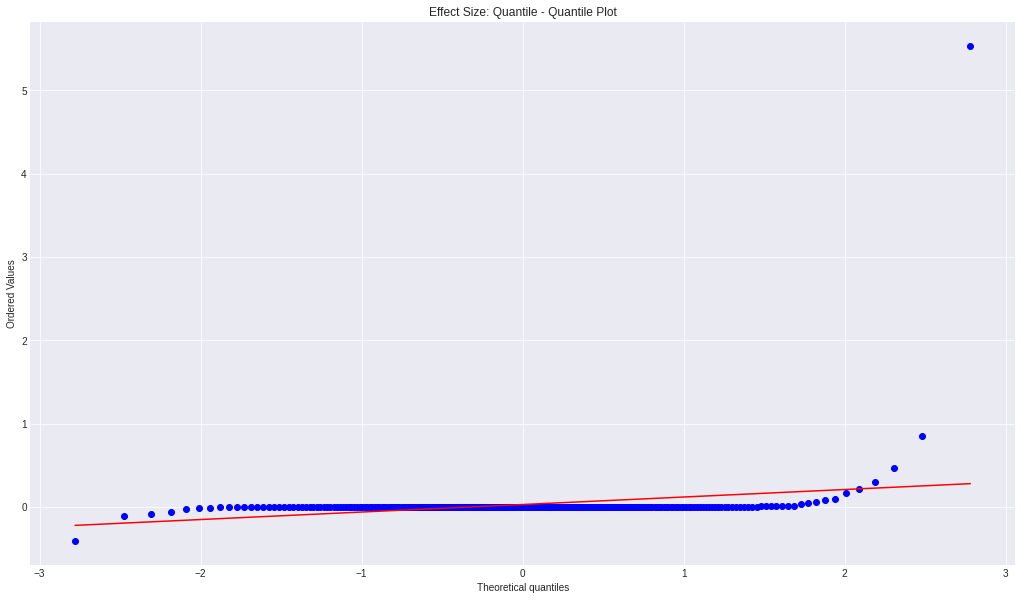

In [52]:
fig = figure(figsize=(60,10))
ax1 = fig.add_subplot(131)
stats.probplot(y1[1:], dist="norm", plot=ax1)
ax1.set_title('Effect Size: Quantile - Quantile Plot')
show()

In [53]:
import statsmodels.api as sm
import numpy as np

xlabs = ['x1','x2','x3','x4','x5','x6','x7','x8']
ylabs = ['y1']
ls_data = doe[xlabs+ylabs]

x = ls_data[xlabs]
x = sm.add_constant(x)

y1 = ls_data['y1']
est1 = sm.OLS(y1,x).fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6268.
Date:                Mon, 21 Mar 2022   Prob (F-statistic):          1.87e-280
Time:                        10:34:50   Log-Likelihood:                 51.946
No. Observations:                 256   AIC:                            -85.89
Df Residuals:                     247   BIC:                            -53.99
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8300      0.013   1100.358      0.0

/home/hera/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


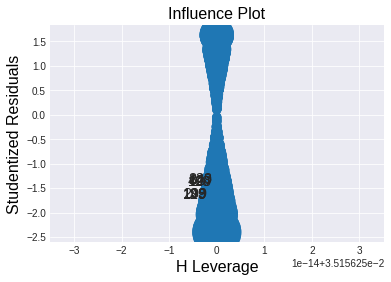

In [54]:
fig = sm.graphics.influence_plot(est1)

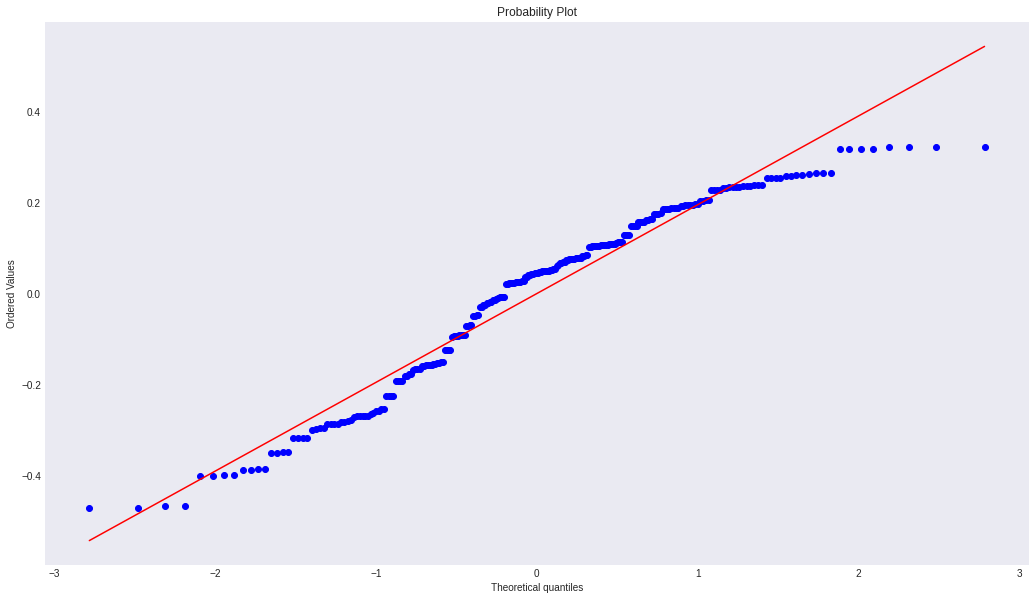

Text(0.5, 1.0, 'Residuals, y1')

In [55]:
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

# Quantify goodness of fit

fig = figure(figsize=(60,10))
ax1 = fig.add_subplot(131)


r1 = y1 - est1.predict(x)

stats.probplot(r1, dist="norm", plot=ax1)

plt.grid()
plt.show()
ax1.set_title('Residuals, y1')



/home/hera/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probability Distribution: Normalized Residual Error, y1')

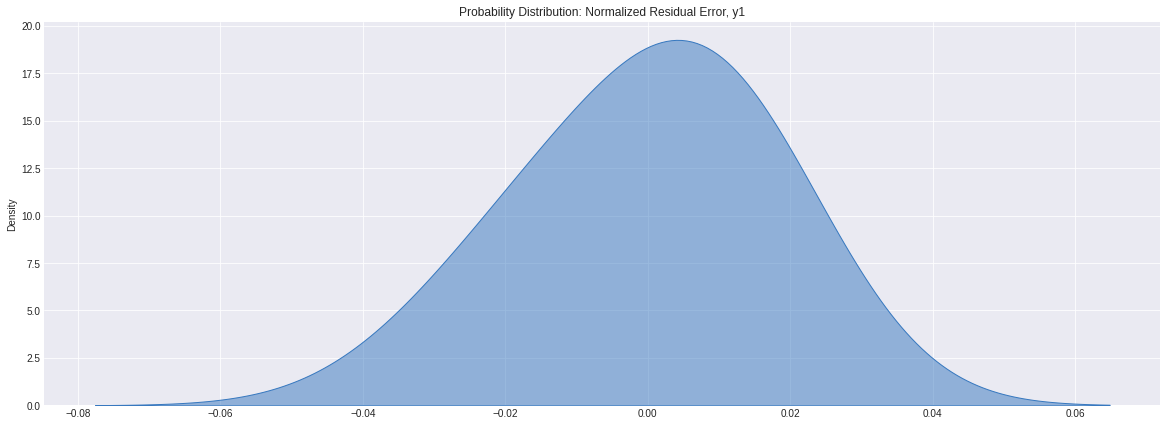

In [56]:
fig = figure(figsize=(20,24))
ax1 = fig.add_subplot(311)

axes = [ax1]

colors = sns.xkcd_palette(["windows blue", "amber", "faded green", "dusty purple","aqua blue"])

#resids = [r1, r2, r3]
normed_resids = [r1/y1]

for (dataa, axx, colorr) in zip(normed_resids,axes,colors):
    sns.kdeplot(dataa, bw=1.0, ax=axx, color=colorr, shade=True, alpha=0.5);

ax1.set_title('Probability Distribution: Normalized Residual Error, y1')


In [57]:
# Our original regression variables
xlabs = ['x2','x3','x4']
doe.groupby(xlabs)[ylabs].mean()

y1
x2 x3 x4           
-1 -1 -1  13.593472
       1  13.594466
    1 -1  14.060788
       1  14.061220
 1 -1 -1  13.600648
       1  13.601495
    1 -1  14.063929
       1  14.064301

In [58]:
# If we decided to go for a different variable set
xlabs = ['x2','x3','x4','x6','x7','x8']
doe.groupby(xlabs)[ylabs].mean()

y1
x2 x3 x4 x6 x7 x8           
-1 -1 -1 -1 -1 -1  13.467441
                1  12.752260
             1 -1  14.074333
                1  13.923674
          1 -1 -1  13.578459
                1  12.920546
             1 -1  14.046692
                1  13.984368
       1 -1 -1 -1  13.468222
                1  12.752791
             1 -1  14.075780
                1  13.924777
          1 -1 -1  13.579297
                1  12.921122
             1 -1  14.048196
                1  13.985539
    1 -1 -1 -1 -1  13.928941
                1  13.187027
             1 -1  14.561245
                1  14.403690
          1 -1 -1  14.044250
                1  13.361462
             1 -1  14.532782
                1  14.466908
       1 -1 -1 -1  13.929271
                1  13.187259
             1 -1  14.561880
                1  14.404154
          1 -1 -1  14.044618
                1  13.361713
             1 -1  14.533439
                1  14.467424
 1 -1 -1 -1 -1 -1  13.474184
                1  12.758206
             1 -1  14.082516
                1  13.931254
          1 -1 -1  13.585358
                1  12.926650
             1 -1  14.054929
                1  13.992085
       1 -1 -1 -1  13.474859
                1  12.758667
             1 -1  14.083736
                1  13.932199
          1 -1 -1  13.586081
                1  12.927149
             1 -1  14.056189
                1  13.993085
    1 -1 -1 -1 -1  13.931888
                1  13.189628
             1 -1  14.564834
                1  14.406998
          1 -1 -1  14.047280
                1  13.364133
             1 -1  14.536375
                1  14.470297
       1 -1 -1 -1  13.932184
                1  13.189829
             1 -1  14.565371
                1  14.407414
          1 -1 -1  14.047598
                1  13.364352
             1 -1  14.536926
                1  14.470737

Text(0, 0.5, 'Residual $r_1$')

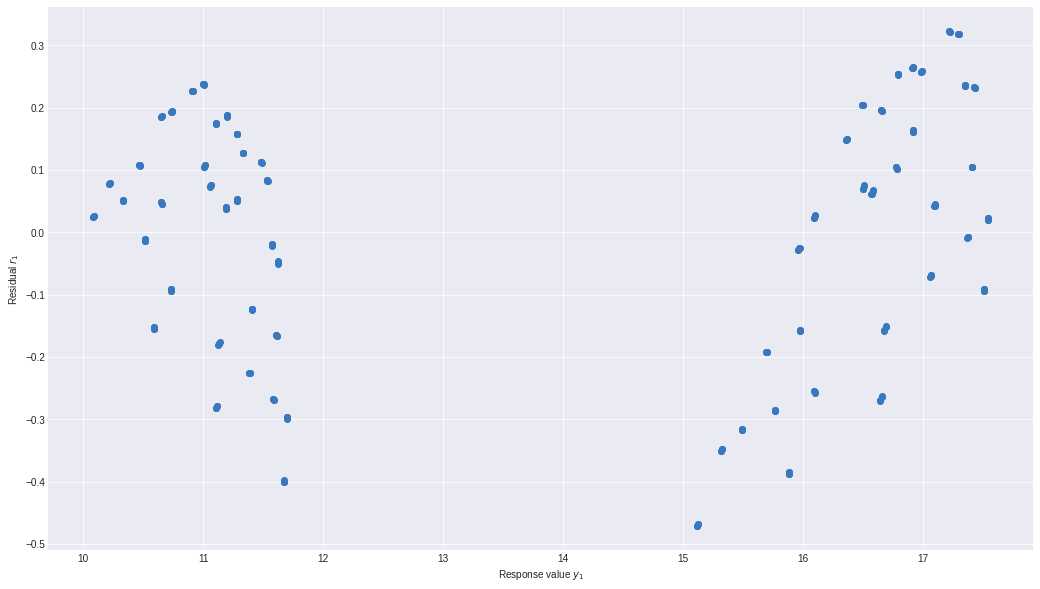

In [59]:
# normal plot of residuals

fig = figure(figsize=(60,10))
ax1 = fig.add_subplot(131)

ax1.plot(y1,r1,'o',color=colors[0])
ax1.set_xlabel('Response value $y_1$')
ax1.set_ylabel('Residual $r_1$')